Name: 신백록

ID: 2019150445

Write your codes and descriptions in the below **implementation** section. \
This file should be successfully implemented when running all cells.

## Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# Additional libraries should be defined here


## Dataset
- Set the random state parameters of all possible functions to your student ID.
- Randomly divide the dataset into training and test subsets using a random seed. 
 > Here, the random seed is your student ID.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

random_seed = 2019150445
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_seed)

load_breast_cancer 함수를 통해 breast_cancer data를 X, y에 각각 dataframe 형식으로 저장하였다.

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


head를 통해 X의 5개 원소를 찍어보면 다음과 같다. mean area같은 특성변수의 값은 1000정도인데 smoothness eroor같은 특성변수의 값은 0.001즈음인 것을 봐서는 scale의 차이가 output에 영향을 미칠 것 같다.
따라서 standard scaler을 사용해야 하여 scale을 조정해야할 것이다.

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train에 standardscaler을 적합시키고 X_test에 X_train에 적합시킨 standardscaler을 적용시켰다.

## Implementation
- Implementing a model to achieve the objective of the assignment and finding the optimal hyper-parameter that derives the highest diagnostic performance.
 1. Use a model stacked up to four Multi-Layer Perceptrons (MLP) for model implementation.
 2. All settings and hyper-parameters **except epoch and batch size**, such as activation function, number of units, learning rate, and optimizer used in the model's layers, must be found by yourself through the model training process.
  > Describe the reason for the performance improvement in the process of finding the optimal setting to achieve the objective performance (*i.e.*, over 80%).\
  > The description should be written by markdown scripts.
 3. Epochs and batch sizes are fixed at **100 and 30**, respectively.

- Train the model using the training dataset.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


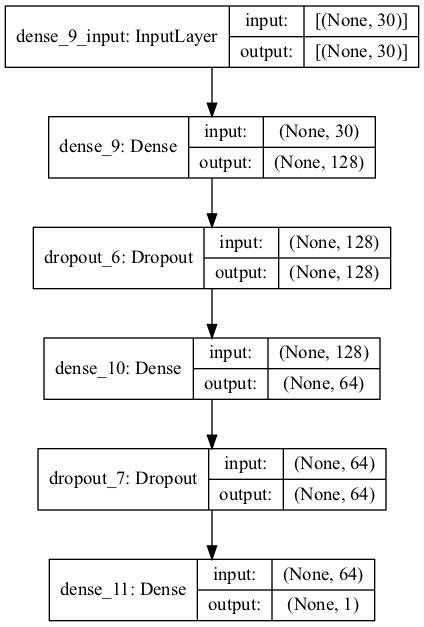

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

model=Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.summary()
plot_model(model,show_shapes=True)

Input dim은 특성변수가 30개이기에 30으로 잡았다.

첫 번째 Dense층을 dimension 128, activation function은 relu로 적합시켰다.

Overfitting을 방지하기 위해 Dropout을 줘서 각각의 노드가 20%의 확률로 노드가 0의 값을 가지게 하였다. 

두 번째 Dense층은 dimension 64, activation function은 위와 같이 relu를 주었고, 추정해야할 모수가 8256개로 첫 번째 층에 비해 많음으로 Dropout 0.4를 주었다.

마지막 Dense층은 y의의 label이 1인 확률을 추출해야하기에 dimension=1, activation='sigmoid'로 주었다.

이렇게 Input layer, Dense1, Dense2, Output layer 총 4개의 layer를 만들었다.
Bottleneck 현상을 막기 위해 dimension이 128부터 점점 작아져 64 dimension에서 최종적으로 한 개의 노드를 추정하게 하였다. 이보다 unit의 수를 크게 잡으면 추정해야 할 모수가 많아져 overfitting이 발생할 가능성이 커지기에 이렇게 잡았다. 

Layer 사이사이에 BatchNormalization을 줘서 모델을 학습도 해보았지만 BatchNormalization없이 학습을 할 때보다 0.9정도의 train acc가 넘으면 모델이 진동하며 test set에 대해서도 전보다 안 좋은 성능이 나왔다. 추가로 각 layer에 he_normal 같은 kernel_initializer도 줘봤지만 이 역시 없을 때의 성능이 더 괜찮게 나왔다.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_list=[EarlyStopping(monitor='val_accuracy',patience=10),ModelCheckpoint(filepath='model.h5', monitor='val_accuracy',save_best_only=True)]

callback을 주기위해 earlystopping, modelcheckpoint를 불러왔고, overfitting을 막기위해 validation_accuracy가 10개의 epoch동안 나아지지 않으면 학습을 중지하도록 하였고, val_accuracy가 개선될 때마다 model을 저장하도록 하였다.

ReduceLROnPlateau 함수를 통해 validation_loss가 일정 epoch동안 나아지지 않으면 learning rate를 줄이게 설정도 해보았다. learning rate를 줄임으로써 global minimum에 수렴할 수 있도록 하기 위함이다. 하지만 오히려 train acc가 0.9정도에서 진동하는 양상을 보이며 학습이 제대로 이루어지지 않았고, ReduceLROnPlateau 함수가 없을 때보다 test set의 성능이 안 좋게 나왔다.

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=30, callbacks=callback_list, validation_split=0.3)
history_out=history.history
history_out.keys()

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.5386 - accuracy: 0.7421

2021-11-28 16:29:07.262865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-28 16:29:07.455265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 17ms/step - loss: 0.5386 - accuracy: 0.7421 - val_loss: 0.3305 - val_accuracy: 0.9489
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2870 - accuracy: 0.9245 - val_loss: 0.1947 - val_accuracy: 0.9635
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1871 - accuracy: 0.9623 - val_loss: 0.1390 - val_accuracy: 0.9708
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1218 - accuracy: 0.9717 - val_loss: 0.1120 - val_accuracy: 0.9708
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0986 - accuracy: 0.9811 - val_loss: 0.0983 - val_accuracy: 0.9708
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1009 - accuracy: 0.9748 - val_loss: 0.0900 - val_accuracy: 0.9781
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0704 - accuracy: 0.9874 - val_loss: 0.0867 - val_accuracy: 0.9781
Epoch 8/100
11/11 [=====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

model compile 부분을 보면, 추정해야하는 y가 0 또는 1이기에 loss='binary_crossentropy'를 사용하였고, optimizer은 learning rate를 각 parameter 별 다른 크기의 update를 하는 adam을 사용하였다. metric='accuracy'를 설정해 accuracy도 출력되게 하였다.

model train 부분에서는 epochs는 callback에 의해 자동으로 멈추기 때문에 100으로 넉넉히 잡았고, batch_size=30, train set안에서 validation_split을 통해 30%만큼 validation에 이용되게 하였다. 16 epoch에서 학습을 멈췄고, train set의 accuracy는 0.9937정도인 반면 validation accuracy는 0.978정도인 것으로 봐서 약간의 overfitting이 발생한 것 같다. train set의 loss는 0.03, validation set의 loss는 0.09정도 인 것을 봐서도 약간의 overfitting이 발생한 것 같다. 하지만 그리 큰 차이가 아니고, 모델이 안정적으로 학습이 되었기 때문에 test set의 성능엔 큰 문제가 되지는 않을 것이다.

train 과정을 history로 저장해 loss, accuracy, validation loss, validation accuracy를 각 epoch 마다 추출하였다.

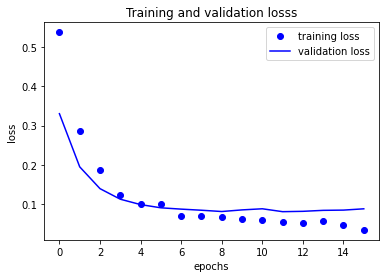

In [19]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

위에서 저장한 history를 가지고 train loss와 validation loss를 plot하였다. epoch이 반복되면서 train loss는 확실히 감소하며 수렴하는 양상을 보이고, train loss와 같이 validation loss도 점점 감소하며 수렴하고 있는 것을 볼 수 있다. 이러한 점에서 매우 안정적인 모델의 학습이 이루어진 것 같다.

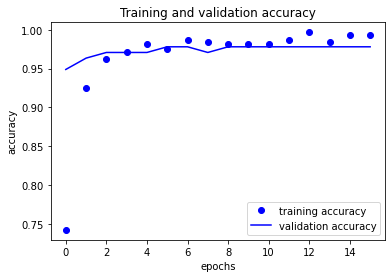

In [20]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(accuracy,'bo',label='training accuracy')
plt.plot(accuracy_val,'b', label='validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

accuracy를 plot하여봐도 마찬가지로 점점 증가하며 안정적이게 수렴하는 양상을 보인다.

## Model Evaluation
- Show the performance (*i.e.*, loss and accuracy) of the trained model using the test dataset.

In [18]:
loss, acc = model.evaluate(X_test, y_test)
print("Student ID: %d | Loss: %.3f, Accuracy: %.3f" % (random_seed, loss, acc))

4/4 [==============================] - 0s 6ms/step - loss: 0.0828 - accuracy: 0.9825
Student ID: 2019150445 | Loss: 0.083, Accuracy: 0.982


test acc는 0.98정도로 overfitting 없이 매우 좋은 성능이 나왔다.